<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793918_HelmyMoreno/blob/main/M%C3%B3dulo_3_Python_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Module 3**


**Presentado**: por Helmy Andrea Moreno Navarro | 01793918

# Analisis de datos con python


## Objetivos

Despues de completar este laboratorio, podra:

* Explorar caracteristicas para predecir el precio del automovil


<h2>Tabla de Contenido</h2>

- Importar datos del modulo
- Analisis de patrones de caracteristicas individuales mediante visualizacion
- Analisis Estadistico Descriptivo
- Conceptos basicos de agrupacion
- Correlacion y causalidad
- ANOVA
<hr>


<h3>Principales caracteristicas que mas inciden en el precio del coche</h3>


In [ ]:
import pandas as pd
import numpy as np

Esta funcion descargara el conjunto de datos en su navegador


In [ ]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

Debera descargar el conjunto de datos; si esta ejecutando localmente, comente lo siguiente


In [ ]:
df = pd.read_csv(path, index_col = 0)
df.index.name = None
df

,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


<h2 id="pattern_visualization">2. Analisis de patrones de caracteristicas individuales mediante visualizacion</h2>


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


**Elegir el metodo de visualizacion adecuado**

<p>Al visualizar variables individuales, es importante comprender primero con que tipo de variable se esta tratando. Esto nos ayudara a encontrar el metodo de visualizacion adecuado para esa variable.</p>


In [ ]:
# Enumerar los tipos de datos para cada columna
print(df.dtypes)

normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


##**Pregunta 1:**

Tipo de datos de la columna "pico-rpm"


In [ ]:
df['peak-rpm'].dtypes


dtype('float64')

Por ejemplo, podemos calcular la **correlacion entre variables** de tipo "int64" o "float64" usando el metodo "corr":


In [ ]:
df.corr()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
normalized-losses,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303
compression-ratio,-0.114713,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001263,0.187923,1.000000,-0.214514,-0.435780,0.331425,0.268465,0.071107,-0.299372,0.985231,-0.985231


Los elementos diagonales son siempre uno; estudiaremos la correlacion con mas precision la correlacion de Pearson en profundidad al final del cuaderno.

##**Pregunta 2:**

<p><p>Encuentre la correlacion entre las siguientes columnas: diametro interior, carrera, relacion de compresion y potencia.</p>
<p>Sugerencia: si desea seleccionar esas columnas, use la siguiente sintaxis:.</p>
[['bore','stroke','compression-ratio','horsepower']]</p>

In [ ]:
# Write your code below and press Shift+Enter to execute 
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2>Variables numericas continuas:</h2>

<p>Las variables numericas continuas son variables que pueden contener cualquier valor dentro de algun rango. Pueden ser del tipo "int64" o "float64". Una excelente forma de visualizar estas variables es mediante diagramas de dispersion con lineas ajustadas.</p>

<p>Para comenzar a comprender la relacion (lineal) entre una variable individual y el precio, podemos usar "regplot" que traza el diagrama de dispersion mas la linea de regresion ajustada para los datos.</p>

Let's see several examples of different linear relationships:


<h3>Relacion lineal positiva</h3>


Encontremos el diagrama de dispersion de "tamaño del motor" y "precio".


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 53416.77496719109)

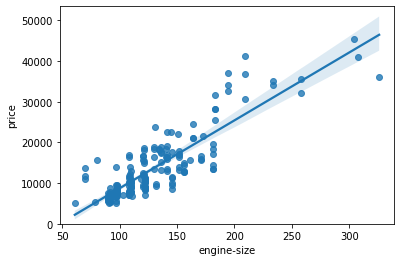

In [ ]:
# Tamaño del motor como potencial variable predictora del precio
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>A medida que aumenta el tamaño del motor, aumenta el precio: esto indica una correlacion directa positiva entre estas dos variables. El tamaño del motor parece un indicador bastante bueno del precio, ya que la linea de regresion es casi una linea diagonal perfecta.</p>


Podemos examinar la correlacion entre 'tamaño del motor' y 'precio' y ver que es aproximadamente 0,87.

In [ ]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000



El mpg en carretera es una variable predictiva potencial del precio. Encontremos el diagrama de dispersion de "mpg en carretera" y "precio".


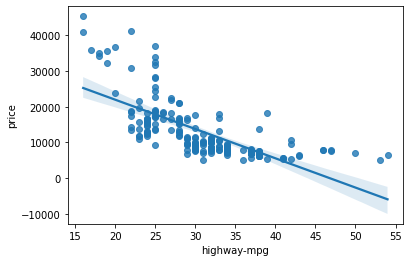

In [ ]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p>A medida que aumenta el mpg en carretera, el precio disminuye: esto indica una relacion inversa/negativa entre estas dos variables. El mpg en carretera podria ser un predictor del precio.</p>



Podemos examinar la correlacion entre 'mpg en carretera' y 'precio' y ver que es aproximadamente -0.704.


In [ ]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000



<h3>Relacion lineal debil</h3>


Veamos si "pico-rpm" es una variable predictora de "precio".


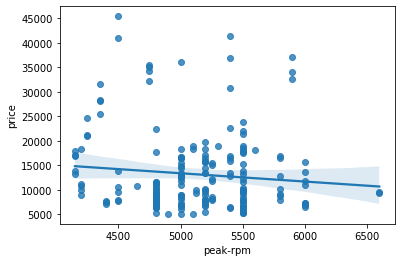

In [ ]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Las rpm maximas no parecen ser un buen predictor del precio en absoluto, ya que la linea de regresion esta cerca de la horizontal. Ademas, los puntos de datos estan muy dispersos y lejos de la linea ajustada, mostrando mucha variabilidad. Por lo tanto, no es una variable confiable.</p>


Podemos examinar la correlacion entre 'rpm pico' y 'precio' y ver que es aproximadamente -0.101616


In [ ]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


##**Pregunta 3 a):**

<p>
Encuentra la correlacion entre x="carrera" y y="precio".</p>
<p>Sugerencia: si desea seleccionar esas columnas, use la siguiente sintaxis: df[["stroke","price"]].  </p>


In [ ]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<div class="alerta alerta-peligro alertapeligro" estilo="margin-top: 20px">
<h1>Pregunta 3 b):</h1>

<p>Dados los resultados de la correlacion entre "precio" y "carrera", ¿espera una relacion lineal?</p>
<p>Verifica tus resultados usando la funcion "regplot()".</p>
</div>


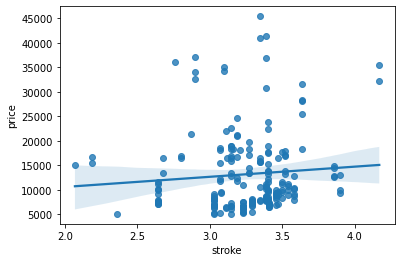

In [ ]:
sns.regplot(x="stroke", y="price", data=df)

<h3>Variables categoricas</h3>

<p>Estas son variables que describen una "caracteristica" de una unidad de datos y se seleccionan de un pequeño grupo de categorias. Las variables categoricas pueden tener el tipo "objeto" o "int64". Una buena forma de visualizar variables categoricas es mediante diagramas de caja.</p>



Veamos la relacion entre "estilo de carroceria" y "precio".


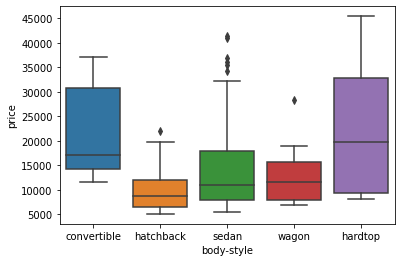

In [ ]:
sns.boxplot(x="body-style", y="price", data=df)


<p>Vemos que las distribuciones de precio entre las diferentes categorias de estilo de carroceria tienen una superposicion significativa, por lo que el estilo de carroceria no seria un buen predictor del precio. Examinemos la "ubicacion del motor" y el "precio" del motor:</p>


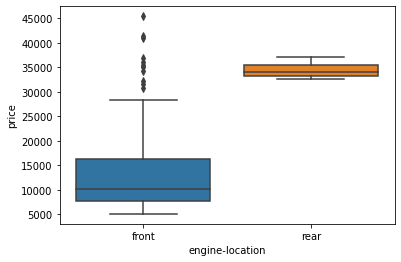

In [ ]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Aqui vemos que la distribucion del precio entre estas dos categorias de ubicacion del motor, delantera y trasera, son lo suficientemente distintas como para tomar la ubicacion del motor como un buen predictor potencial del precio.</p>



Examinemos "ruedas motrices" y "precio".


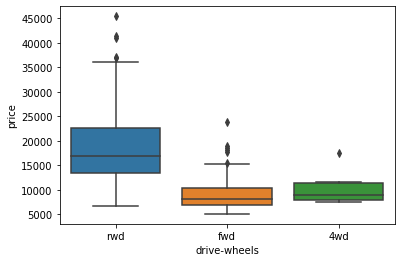

In [ ]:
sns.boxplot(x="drive-wheels", y="price", data=df)


<p>Aqui vemos que la distribucion del precio entre las diferentes categorias de ruedas motrices es diferente. Como tal, las ruedas motrices podrian potencialmente predecir el precio.</p>


<h2 id="estadisticas_descriptivas">3. Analisis Estadistico Descriptivo</h2>


<p>Primero echemos un vistazo a las variables utilizando un metodo de descripcion.</p>

<p>La funcion <b>describe</b> calcula automaticamente estadisticas basicas para todas las variables continuas. Cualquier valor de NaN se omite automaticamente en estas estadisticas.</p>

Esto mostrara:

<ul>
    <li>El recuento de esa variable</li>
    <li>La media</li>
    <li>La desviacion estandar (std)</li>
    <li>El valor minimo</li>
    <li>El IQR (rango intercuartilico: 25 %, 50 % y 75 %)</li>
    <li>El valor maximo</li>
<ul>



Podemos aplicar el metodo "describe" de la siguiente manera:


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
normalized-losses,201.0,122.000000,31.996250,65.000000,101.000000,122.000000,137.000000,256.000000
wheel-base,201.0,98.797015,6.066366,86.600000,94.500000,97.000000,102.400000,120.900000
length,201.0,0.837102,0.059213,0.678039,0.801538,0.832292,0.881788,1.000000
width,201.0,0.915126,0.029187,0.837500,0.890278,0.909722,0.925000,1.000000
height,201.0,53.766667,2.447822,47.800000,52.000000,54.100000,55.500000,59.800000
curb-weight,201.0,2555.666667,517.296727,1488.000000,2169.000000,2414.000000,2926.000000,4066.000000
engine-size,201.0,126.875622,41.546834,61.000000,98.000000,120.000000,141.000000,326.000000
bore,201.0,3.330692,0.268072,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,197.0,3.256904,0.319256,2.070000,3.110000,3.290000,3.410000,4.170000
compression-ratio,201.0,10.164279,4.004965,7.000000,8.600000,9.000000,9.400000,23.000000


La configuracion predeterminada de "describir" omite variables de tipo objeto. Podemos aplicar el metodo "describe" sobre las variables de tipo 'objeto' de la siguiente manera:


In [ ]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
make,201,22,toyota,32
aspiration,201,2,std,165
num-of-doors,201,2,four,115
body-style,201,5,sedan,94
drive-wheels,201,3,fwd,118
engine-location,201,2,front,198
engine-type,201,6,ohc,145
num-of-cylinders,201,7,four,157
fuel-system,201,8,mpfi,92
horsepower-binned,200,3,Low,115



<h3>Cuentas de valor</h3>


<p>Value Counts es una buena manera de entender cuantas unidades de cada caracteristica/variable tenemos. Podemos aplicar el metodo "value_counts" en la columna "drive-wheels". No olvide que el metodo "value_counts" solo funciona en series de pandas, no en marcos de datos de pandas. Como resultado, solo incluimos un corchete <code>df['drive-wheels']</code>, no dos corchetes <code>df[['drive-wheels']]</code>.</p>


In [ ]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Podemos convertir la serie a un marco de datos de la siguiente manera:


In [ ]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8



Repitamos los pasos anteriores, pero guardemos los resultados en el marco de datos "drive_wheels_counts" y cambiemos el nombre de la columna 'drive-wheels' a 'value_counts'.


In [ ]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8



Ahora cambiemos el nombre del indice a 'drive-wheels':

In [ ]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Podemos repetir el proceso anterior para la variable 'ubicacion del motor'.


In [ ]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>Despues de examinar los recuentos de valor de la ubicacion del motor, vemos que la ubicacion del motor no seria una buena variable de prediccion del precio. Esto se debe a que solo tenemos tres autos con motor trasero y 198 con motor delantero, por lo que este resultado esta sesgado. Por lo tanto, no podemos sacar ninguna conclusion sobre la ubicacion del motor.</p>


<h2 id="agrupacion_basica">4. Conceptos basicos de agrupacion</h2>


<p>El metodo "groupby" agrupa datos por diferentes categorias. Los datos se agrupan en funcion de una o varias variables, y el analisis se realiza en los grupos individuales.</p>

<p>Por ejemplo, agrupemos por la variable "ruedas motrices". Vemos que hay 3 categorias diferentes de ruedas motrices.</p>

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>Si queremos saber, en promedio, que tipo de rueda motriz es mas valiosa, podemos agrupar "ruedas motrices" y luego promediarlas.</p>

<p>Podemos seleccionar las columnas 'drive-wheels', 'body-style' y 'price', y luego asignarlas a la variable "df_group_one".</p>

In [ ]:
df_group_one = df[['drive-wheels','body-style','price']]

Luego podemos calcular el precio promedio para cada una de las diferentes categorias de datos.


In [ ]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>Segun nuestros datos, parece que los vehiculos con traccion trasera son, en promedio, los mas caros, mientras que los de 4 ruedas y los de traccion delantera tienen aproximadamente el mismo precio.</p>

<p>Tambien puede agrupar por multiples variables. Por ejemplo, agrupemos por 'ruedas motrices' y 'estilo de carroceria'. Esto agrupa el marco de datos por la combinacion unica de 'ruedas motrices' y 'estilo de carroceria'. Podemos almacenar los resultados en la variable 'grouped_test1'.</p>


In [ ]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>Estos datos agrupados son mucho mas faciles de visualizar cuando se convierten en una tabla dinamica. Una tabla dinamica es como una hoja de calculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila. Podemos convertir el marco de datos en una tabla dinamica usando el metodo "pivote" para crear una tabla dinamica a partir de los grupos.</p>

<p>En este caso, dejaremos la variable drive-wheels como las filas de la tabla y pivotearemos el estilo del cuerpo para que se convierta en las columnas de la tabla:</p>


In [ ]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222


<p>A menudo, no tendremos datos para algunas de las celdas dinamicas. Podemos llenar estas celdas que faltan con el valor 0, pero tambien se podria usar cualquier otro valor. Cabe mencionar que la falta de datos es un tema bastante complejo y es un curso completo por si solo.</p>


In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta4:</h1>


<p>Use la funcion "groupby" para encontrar el "precio" promedio de cada automovil segun el "estilo de carroceria".</p>
</div>


In [ ]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle


,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [ ]:
import matplotlib.pyplot as plt



<h4>Variables: ruedas motrices y estilo de carroceria frente a precio</h4>



Usemos un mapa de calor para visualizar la relacion entre Body Style vs Price.


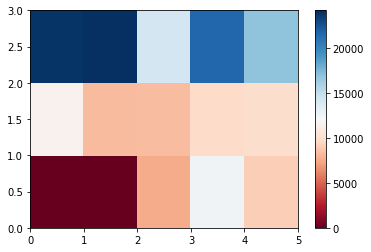

In [ ]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>El mapa de calor traza la variable de destino (precio) proporcional al color con respecto a las variables 'drive-wheel' y 'body-style' en el eje vertical y horizontal, respectivamente. Esto nos permite visualizar como se relaciona el precio con la 'rueda motriz' y el 'estilo de la carroceria'.</p>

<p>Las etiquetas predeterminadas no transmiten informacion util para nosotros. Cambiemos eso:</p>


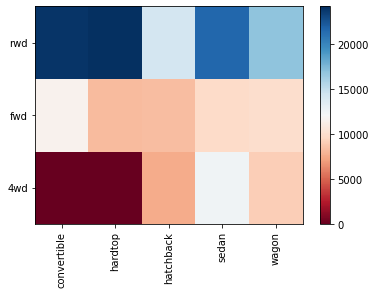

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>La visualizacion es muy importante en la ciencia de datos y los paquetes de visualizacion de Python brindan una gran libertad. Profundizaremos mas en un curso separado de visualizaciones de Python.</p>

<p>La pregunta principal que queremos responder en este modulo es: "¿Cuales son las principales caracteristicas que tienen un mayor impacto en el precio del automovil?".</p>

<p>Para obtener una mejor medida de las caracteristicas importantes, observamos la correlacion de estas variables con el precio del automovil. En otras palabras: ¿como depende el precio del coche de esta variable?</p>


<h2 id="correlacion_causalidad">5. Correlacion y causalidad</h2>


<p><b>Correlacion</b>: una medida del grado de interdependencia entre variables.</p>

<p><b>Causalidad</b>: la relacion entre causa y efecto entre dos variables.</p>

<p>Es importante saber la diferencia entre estos dos. La correlacion no implica causa. Determinar la correlacion es mucho mas simple que determinar la causalidad, ya que la causalidad puede requerir una experimentacion independiente.</p>



<p><b>Correlacion de Pearson</b></p>
<p>La Correlacion de Pearson mide la dependencia lineal entre dos variables X e Y.</p>
<p>El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:</p>
<ul>
    <li><b>1</b>: Correlacion lineal positiva perfecta.</li>
    <li><b>0</b>: Sin correlacion lineal, lo mas probable es que las dos variables no se afecten entre si.</li>
    <li><b>-1</b>: correlacion lineal negativa perfecta.</li>
</ul>


<p>La correlacion de Pearson es el metodo predeterminado de la funcion "corr". Como antes, podemos calcular la Correlacion de Pearson de las variables 'int64' o 'float64'.</p>

In [ ]:
df.corr()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
normalized-losses,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303
compression-ratio,-0.114713,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001263,0.187923,1.000000,-0.214514,-0.435780,0.331425,0.268465,0.071107,-0.299372,0.985231,-0.985231


A veces nos gustaria saber el significado de la correlacion estimada.

<b>Valor P</b>

<p>¿Cual es este valor P? El valor P es el valor de probabilidad de que la correlacion entre estas dos variables sea estadisticamente significativa. Normalmente, elegimos un nivel de significacion de 0,05, lo que significa que tenemos un 95 % de confianza en que la correlacion entre las variables es significativa.</p>

Por convencion, cuando el

<ul>
    <li>El valor p es $<$ 0,001: decimos que hay pruebas solidas de que la correlacion es significativa.</li>
    <li>el valor p es $<$ 0,05: existe evidencia moderada de que la correlacion es significativa.</li>
    <li>el valor p es $<$ 0.1: hay evidencia debil de que la correlacion es significativa.</li>
    <li>el valor p es $>$ 0,1: no hay evidencia de que la correlacion sea significativa.</li>
</ul>


Podemos obtener esta informacion usando el modulo "stats" en la biblioteca "scipy".


In [ ]:
from scipy import stats


**Distancia entre ejes vs. Precio**


Calculemos el coeficiente de correlacion de Pearson y el valor P de la 'distancia entre ejes' y el 'precio'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


**Conclusion:**
<p>Dado que el valor p es $<$ 0,001, la correlacion entre la distancia entre ejes y el precio es estadisticamente significativa, aunque la relacion lineal no es extremadamente fuerte (~0,585).</p>


<h3>Caballos de fuerza frente a precio</h3>


Calculemos el coeficiente de correlacion de Pearson y el valor P de 'caballos de fuerza' y 'precio'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428260101e-48



**Conclusiones:**

<p>Dado que el valor p es $<$ 0,001, la correlacion entre la potencia y el precio es estadisticamente significativa, y la relacion lineal es bastante fuerte (~0,809, cerca de 1).</p>


**Duracion frente a precio**

Calculemos el coeficiente de correlacion de Pearson y el valor P de 'longitud' y 'precio'.

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159556e-30


**Conclusiones:**

<p>Dado que el valor p es $<$ 0,001, la correlacion entre la longitud y el precio es estadisticamente significativa, y la relacion lineal es moderadamente fuerte (~0,691).</p>


**Ancho frente a precio**



Calculemos el coeficiente de correlacion de Pearson y el valor P de 'ancho' y 'precio':

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


#### **Conclusion:**


Dado que el valor p es < 0,001, la correlacion entre el ancho y el precio es estadisticamente significativa y la relacion lineal es bastante fuerte (\~0,751).



**Peso en vacio vs precio**



Calculemos el coeficiente de correlacion de Pearson y el valor P de 'peso en vacio' y 'precio':

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


**Conclusion:**
<p>Dado que el valor p es $<$ 0,001, la correlacion entre el peso en vacio y el precio es estadisticamente significativa, y la relacion lineal es bastante fuerte (~0,834).</p>



Tamaño del motor frente a precio

Calculemos el coeficiente de correlacion de Pearson y el valor P de 'tamaño del motor' y 'precio':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


**Conclusion:**

<p>Dado que el valor p es $<$ 0,001, la correlacion entre el tamaño del motor y el precio es estadisticamente significativa, y la relacion lineal es muy fuerte (~0,872).</p>

**Bore vs price**



Calculemos el coeficiente de correlacion de Pearson y el valor P de 'diametro interior' y 'precio':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


Conclusion:
**texto en negrita**
<p>Dado que el valor p es $<$ 0,001, la correlacion entre la perforacion y el precio es estadisticamente significativa, pero la relacion lineal es solo moderada (~0,521).</p>


Podemos relacionar el proceso para cada 'city-mpg' y 'highway-mpg':



**MPG por ciudad vs precio**


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


**Conclusion:**

<p>Dado que el valor p es $<$ 0,001, la correlacion entre la ciudad-mpg y el precio es estadisticamente significativa, y el coeficiente de alrededor de -0,687 muestra que la relacion es negativa y moderadamente fuerte.</p>


<h3>Highway-mpg vs. Price</h3>


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


**Conclusion:**

Dado que el valor p es < 0,001, la correlacion entre el mpg en carretera y el precio es estadisticamente significativa, y el coeficiente de alrededor de -0,705 muestra que la relacion es negativa y moderadamente fuerte.

<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: 
Analisis de variacion</h3>
<p>El analisis de varianza (ANOVA) es un metodo estadistico que se utiliza para comprobar si existen diferencias significativas entre las medias de dos o mas grupos. ANOVA devuelve dos parametros:</p>

<p><b>Puntuacion de la prueba F</b>: ANOVA asume que las medias de todos los grupos son iguales, calcula cuanto se desvian las medias reales de la suposicion y lo notifica como la puntuacion de la prueba F. Una puntuacion mayor significa que hay una diferencia mayor entre las medias.</p>

<p><b>Valor P</b>: el valor P indica cuan estadisticamente significativo es nuestro valor de puntaje calculado.</p>

<p>Si nuestra variable de precio esta fuertemente correlacionada con la variable que estamos analizando, esperamos que ANOVA arroje una puntuacion de prueba F considerable y un valor de p pequeño.</p>


<h3>Drive Wheels</h3>


<p>Dado que ANOVA analiza la diferencia entre diferentes grupos de la misma variable, la funcion groupby sera util. Debido a que el algoritmo ANOVA promedia los datos automaticamente, no necesitamos tomar el promedio de antemano.</p>

<p>Para ver si los diferentes tipos de 'ruedas motrices' afectan el 'precio', agrupamos los datos.</p>


In [ ]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
3,rwd,13495.0
3,rwd,16500.0
2,fwd,13950.0
2,4wd,17450.0
2,fwd,15250.0
2,4wd,7603.0


In [ ]:
df_gptest

,drive-wheels,body-style,price
3,rwd,convertible,13495.0
3,rwd,convertible,16500.0
1,rwd,hatchback,16500.0
2,fwd,sedan,13950.0
2,4wd,sedan,17450.0
...,...,...,...
-1,rwd,sedan,16845.0
-1,rwd,sedan,19045.0
-1,rwd,sedan,21485.0
-1,rwd,sedan,22470.0



Podemos obtener los valores del grupo de metodos usando el metodo "get_group".


In [ ]:
grouped_test2.get_group('4wd')['price']

2    17450.0
2     7603.0
0     9233.0
0    11259.0
0     8013.0
0    11694.0
0     7898.0
0     8778.0
Name: price, dtype: float64

Podemos usar la funcion 'f_oneway' en el modulo 'stats' para obtener el <b>F-test score</b> y <b>P-value</b>.


In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Este es un gran resultado con una gran puntuacion de la prueba F que muestra una fuerte correlacion y un valor P de casi 0, lo que implica una significacion estadistica casi segura. Pero, ¿significa esto que los tres grupos evaluados estan altamente correlacionados?

Examinemoslos por separado.

#### fwd and rwd


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23



Examinemos los otros grupos.


#### 4wd and rwd


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<h4>4wd and fwd</h4>


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666



**Conclusion: Variables importantes**


<p>Ahora tenemos una mejor idea de como se ven nuestros datos y que variables es importante tener en cuenta al predecir el precio del automovil. Lo hemos reducido a las siguientes variables:</p>

Variables numericas continuas:

<ul>
    <li>Longitud</li>
    <li>Ancho</li>
    <li>Peso en vacio</li>
    <li>Tamaño del motor</li>
    <li>Caballos de fuerza</li>
    <li>MPG por ciudad</li>
    <li>mpg en autopista</li>
    <li>Distancia entre ejes</li>
    <li>Aburrir</li>
</ul>

Variables categoricas:

<ul>
    <li>Ruedas motrices</li>
</ul>

<p>A medida que avanzamos en la creacion de modelos de aprendizaje automatico para automatizar nuestro analisis, alimentar el modelo con variables que afecten significativamente a nuestra variable objetivo mejorara el rendimiento de prediccion de nuestro modelo.</p>
